### Hierarchical CLustering on Cars dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df_ = pd.read_csv("../DATA/cluster_mpg.csv")

In [4]:
df_.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df_["origin"].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

#### Data Preprocessing

In [7]:
df = pd.get_dummies(df_.drop("name", axis = 1))

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
X = scaler.fit_transform(df)

In [13]:
df_X = pd.DataFrame(X, columns = df.columns)

In [14]:
df_X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


#### Visualization 
Heatmap and CLustermap

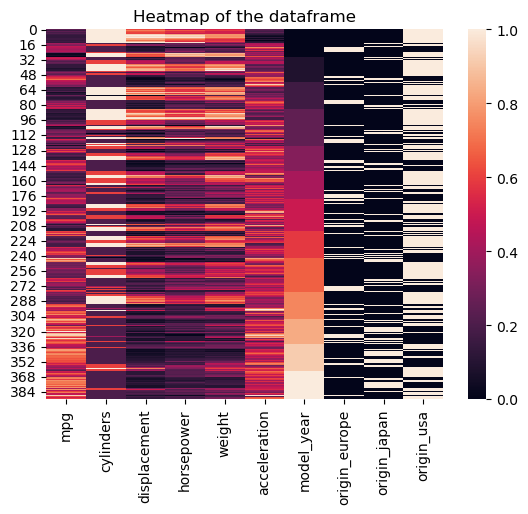

In [17]:
plt.title("Heatmap of the dataframe");
sns.heatmap(data = df_X);

Since the data is scaled by Min Max scaler all the data lie in the range of 0 - 1

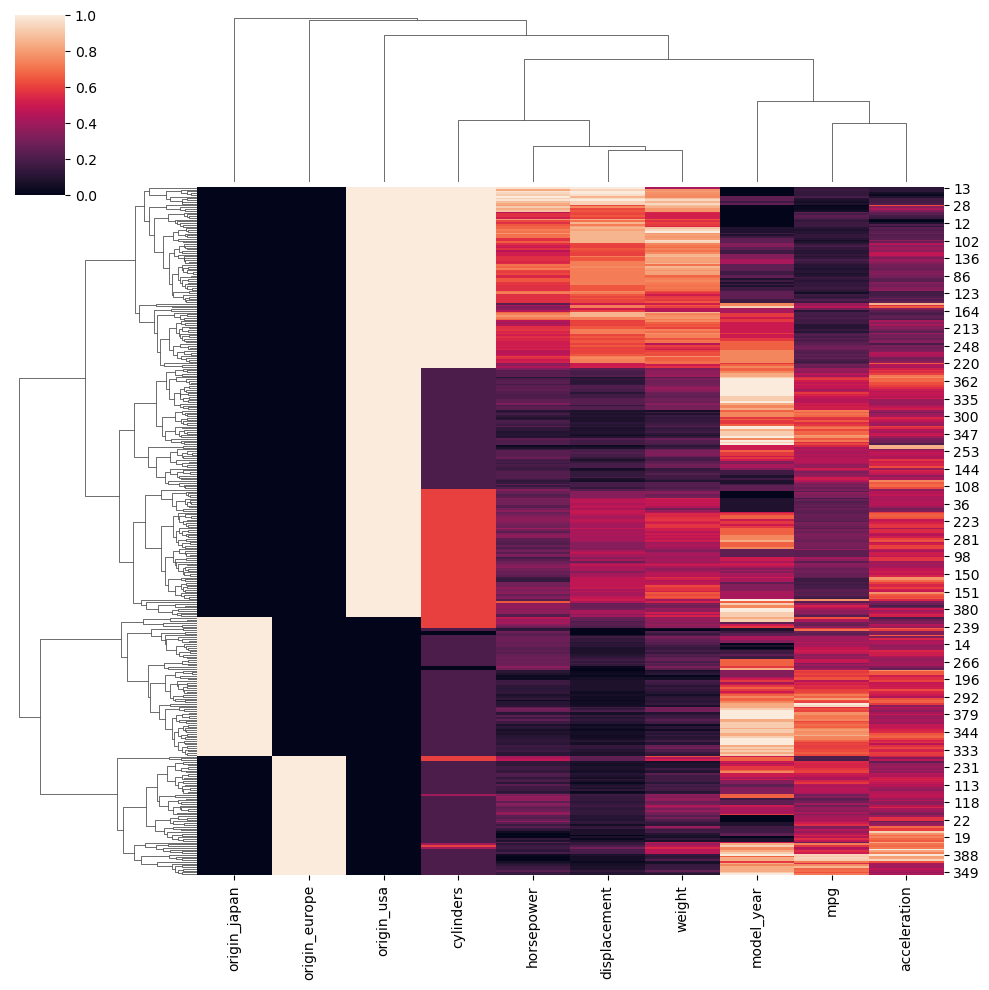

In [19]:
sns.clustermap(data = df_X);

#### Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

set n_clusters when you know already the number of clusters to make

In [27]:
model = AgglomerativeClustering(n_clusters=3)

In [28]:
cluster_labels = model.fit_predict(X)

In [29]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,

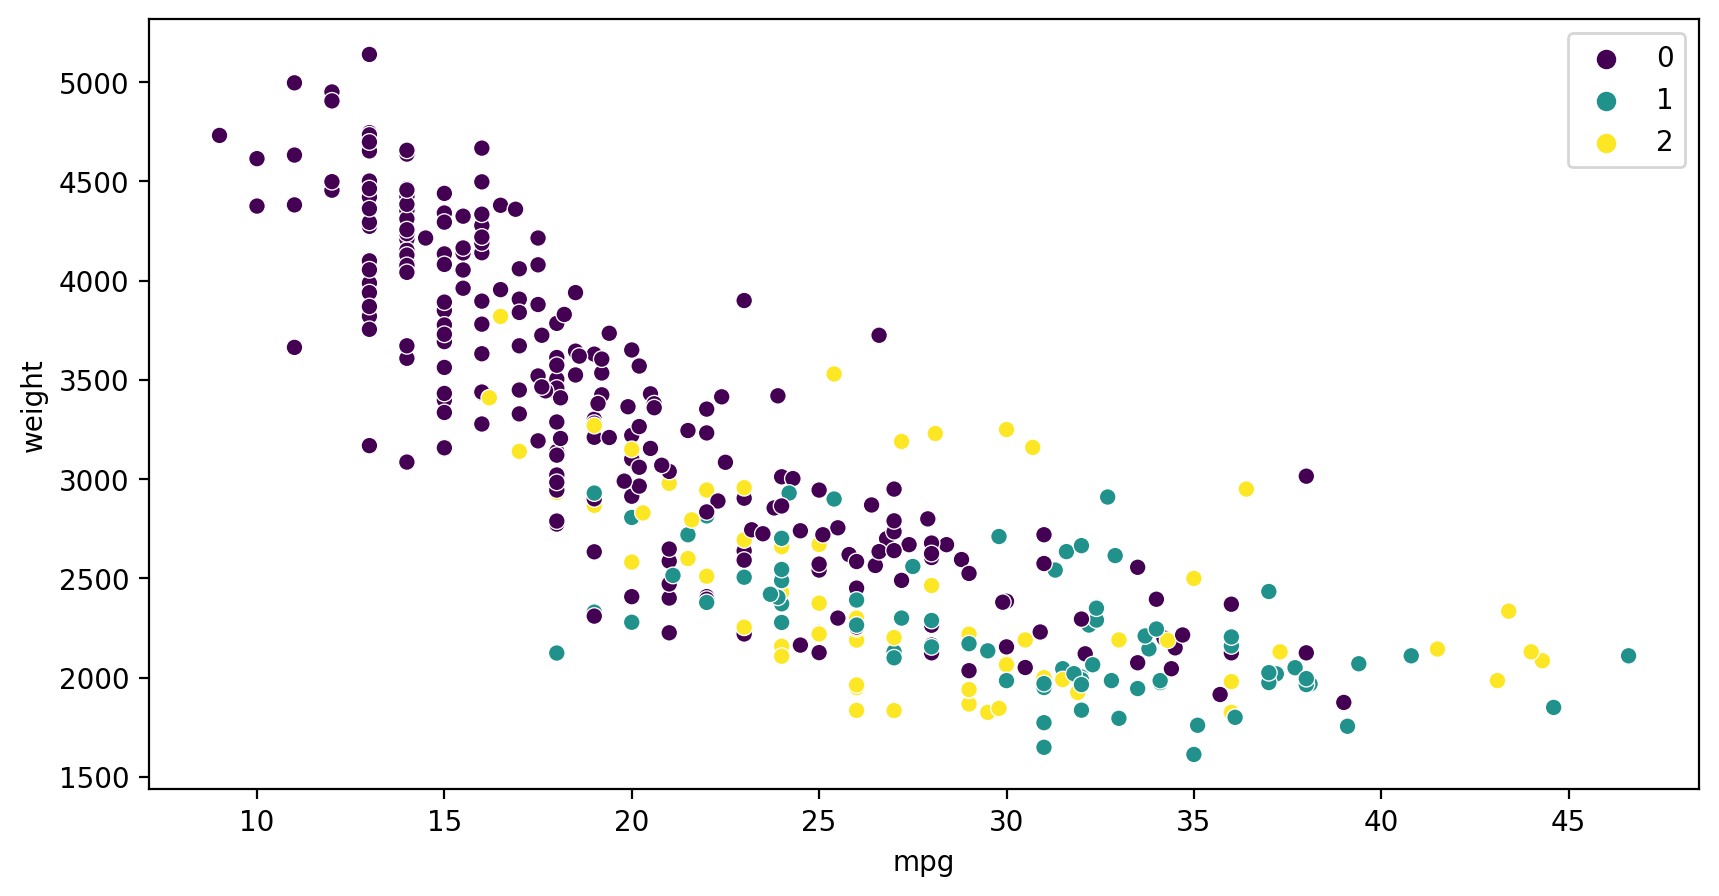

In [30]:
plt.figure(figsize = (10,5), dpi = 200)
sns.scatterplot(data = df_, x = "mpg", y = "weight", hue = cluster_labels, palette = "viridis");

In [31]:
len(df.columns)

10

model cluster with distance threshold

In [55]:
model_ = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [56]:
label_ = model_.fit_predict(X)

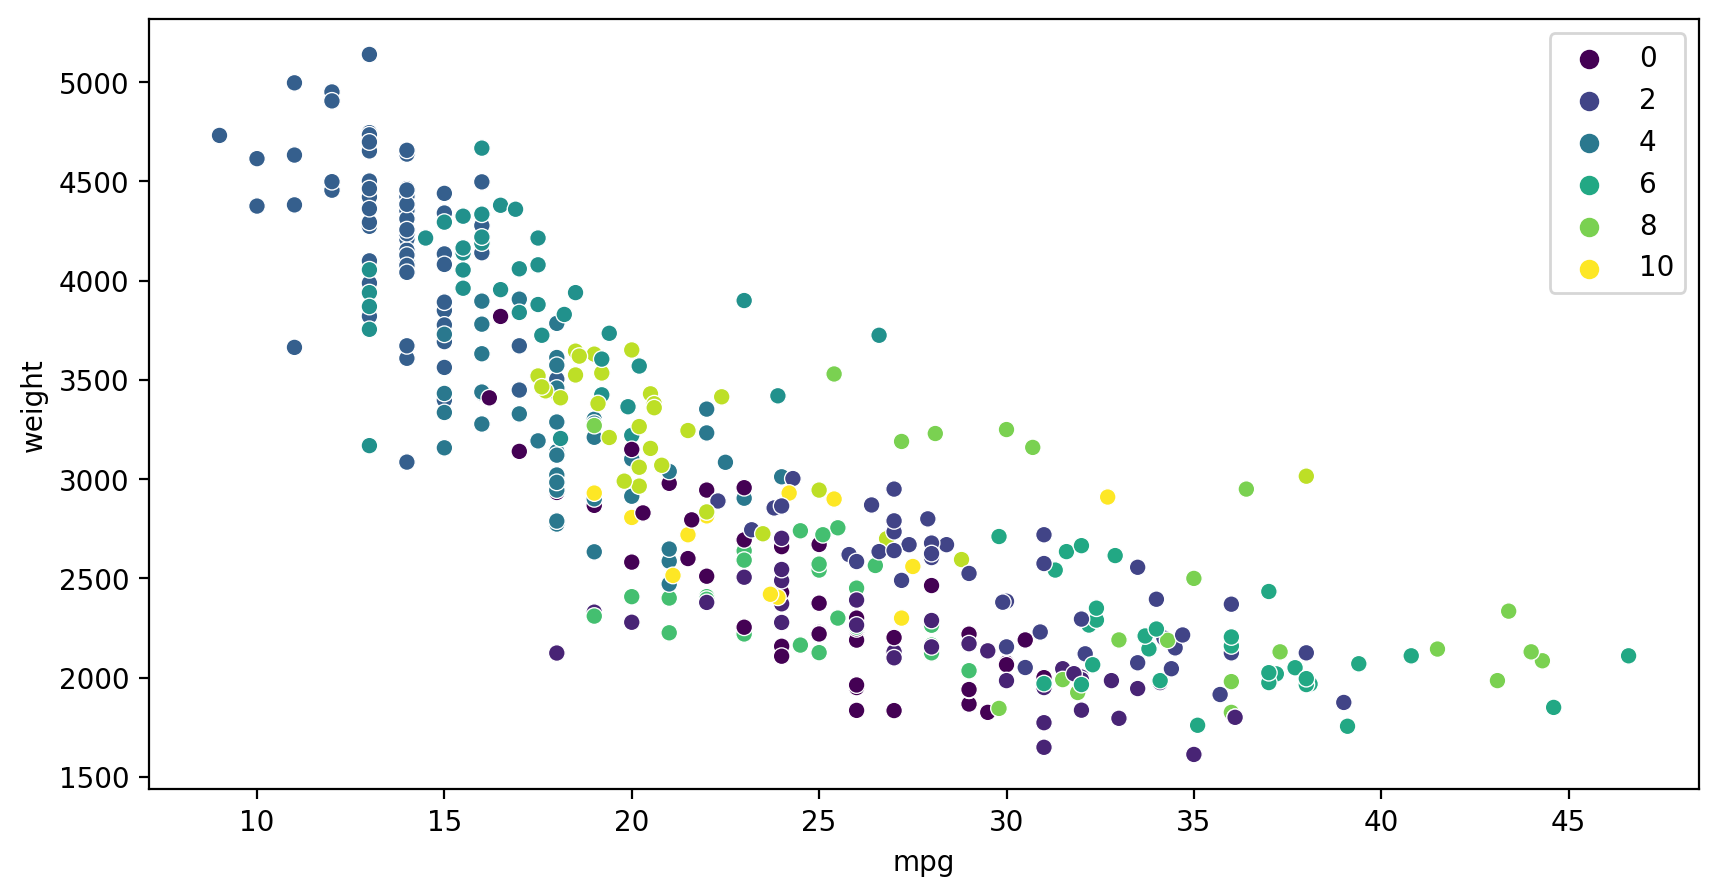

In [63]:
plt.figure(figsize = (10,5), dpi = 200)
sns.scatterplot(data = df_, x = "mpg", y = "weight", hue = label_, palette = "viridis");

In [57]:
label_    # every data point has its own lable since threshold is zero

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

Dendrogram

In [58]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [59]:
linkage_matrix = hierarchy.linkage(model_.children_)

In [60]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

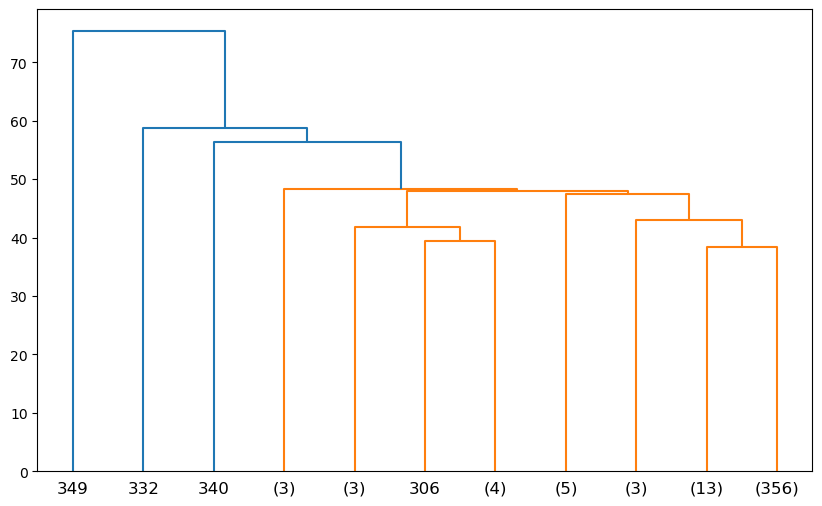

In [62]:
plt.figure(figsize = (10,6))
dendroo = dendrogram(linkage_matrix, truncate_mode="lastp", p = 11)

data points are along x - axis and y axis is the distance between them

In [45]:
np.sqrt(len(df.columns))       # Max distance possible in the dataset

3.1622776601683795